<a href="https://colab.research.google.com/github/NaveenShetter1/Machine-Leaning-Notebooks/blob/main/KNNClassifier2Hyper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv('/content/Classified Data.csv',index_col=0)

In [48]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [49]:
df.shape

(1000, 11)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [51]:
df.isnull().sum()

,0
WTT,0
PTI,0
EQW,0
SBI,0
LQE,0
QWG,0
FDJ,0
PJF,0
HQE,0
NXJ,0


In [52]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [53]:
x=df.drop('TARGET CLASS',axis=1)

In [54]:
x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [55]:
y=df['TARGET CLASS']

In [56]:
y.head()

,TARGET CLASS
0,1
1,0
2,0
3,1
4,1


In [57]:
x.shape

(1000, 10)

In [58]:
y.shape

(1000,)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

In [61]:
from scipy.stats import zscore

In [62]:
new_df=df.copy()

for i in new_df:
  print(i)
  print('==========')
  print('zscore    ', zscore(df[i]))

WTT
zscore     0     -0.123542
1     -1.084836
2     -0.788702
3      0.982841
4      1.139275
         ...   
995    0.211653
996   -1.292453
997    0.641777
998    0.467072
999   -0.387654
Name: WTT, Length: 1000, dtype: float64
PTI
zscore     0      0.185907
1     -0.430348
2      0.339318
3      1.060193
4     -0.640392
         ...   
995   -0.312490
996   -0.616901
997   -0.513083
998   -0.982786
999   -0.595894
Name: PTI, Length: 1000, dtype: float64
EQW
zscore     0     -0.913431
1     -1.025313
2      0.301511
3     -0.621399
4     -0.709819
         ...   
995    0.065163
996    0.369613
997   -0.179205
998   -1.465194
999   -1.431398
Name: EQW, Length: 1000, dtype: float64
SBI
zscore     0      0.319629
1      0.625388
2      0.755873
3      0.625299
4     -0.057175
         ...   
995   -0.259834
996    0.482648
997    1.022255
998   -0.071465
999    0.512722
Name: SBI, Length: 1000, dtype: float64
LQE
zscore     0     -1.033637
1     -0.444847
2      2.031693
3      0.4528

In [63]:
def checkout(df):
  new_df=df.copy()
  for i in new_df:
    new_df[f'{i}--zscore']=zscore(new_df[i])

  return new_df

In [64]:
df=checkout(df)

In [65]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,...,PTI--zscore,EQW--zscore,SBI--zscore,LQE--zscore,QWG--zscore,FDJ--zscore,PJF--zscore,HQE--zscore,NXJ--zscore,TARGET CLASS--zscore
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,...,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314,1.0
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,...,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759,-1.0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,...,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850,-1.0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,...,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987,1.0
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,...,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510,1.0


In [66]:


df[(df['EQW--zscore']>3) | (df['EQW--zscore']<-3)]

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,...,PTI--zscore,EQW--zscore,SBI--zscore,LQE--zscore,QWG--zscore,FDJ--zscore,PJF--zscore,HQE--zscore,NXJ--zscore,TARGET CLASS--zscore
702,1.109044,1.308035,1.722725,0.728863,1.239349,1.308794,0.770784,0.714099,0.917354,1.060216,...,0.753951,3.049325,0.203737,0.850885,1.426836,-0.755472,-1.238973,-0.820519,-1.481991,-1.0


In [67]:

def checkout(df):
  new_df=df.copy()


  for i in new_df:
    if i[-6:]=="zscore":

      print(new_df[(new_df[i]>3) | (new_df[i]<-3)])

    else:
      print('yes')

      return None




In [68]:
checkout(df)

yes


In [69]:
a='EQW--zscore'
if a[-1:-6]=="zscore":
  print('yes')
else:
  print('no')

no


In [70]:
a[-6:]

'zscore'

In [71]:

def checkout1(df):
  new_df=df.copy()

  count=0
  for i in new_df:
    cou=0
    if i[-6:]=="zscore":
      print('column name:       ',i)
      i=new_df[(new_df[i]>3) | (new_df[i]<-3)]
      print(i)
      count+=1
      cou+=1
  print('Total outliers :  ',count)
  return None


In [72]:
checkout1(df)

column name:        WTT--zscore
Empty DataFrame
Columns: [WTT, PTI, EQW, SBI, LQE, QWG, FDJ, PJF, HQE, NXJ, TARGET CLASS, WTT--zscore, PTI--zscore, EQW--zscore, SBI--zscore, LQE--zscore, QWG--zscore, FDJ--zscore, PJF--zscore, HQE--zscore, NXJ--zscore, TARGET CLASS--zscore]
Index: []

[0 rows x 22 columns]
column name:        PTI--zscore
Empty DataFrame
Columns: [WTT, PTI, EQW, SBI, LQE, QWG, FDJ, PJF, HQE, NXJ, TARGET CLASS, WTT--zscore, PTI--zscore, EQW--zscore, SBI--zscore, LQE--zscore, QWG--zscore, FDJ--zscore, PJF--zscore, HQE--zscore, NXJ--zscore, TARGET CLASS--zscore]
Index: []

[0 rows x 22 columns]
column name:        EQW--zscore
          WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
702  1.109044  1.308035  1.722725  0.728863  1.239349  1.308794  0.770784   

          PJF       HQE       NXJ  ...  PTI--zscore  EQW--zscore  SBI--zscore  \
702  0.714099  0.917354  1.060216  ...     0.753951     3.049325     0.203737   

     LQE--zscore  QWG--zscore  FDJ--

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
sc=StandardScaler()

sc.fit_transform(x_train)
sc.transform(x_test)

array([[-0.48453084, -1.24535018, -1.993735  , ..., -0.73424164,
         1.21401526, -2.01315859],
       [ 0.77739169, -0.0479607 ,  0.59382622, ..., -2.17614343,
         1.28883062, -0.60232262],
       [ 0.21956249, -0.50610928, -0.68098911, ...,  0.16226264,
         2.22171486, -0.09332683],
       ...,
       [-0.27060821,  1.87330542, -0.8472869 , ..., -1.41050032,
        -1.41348135, -1.27435596],
       [ 0.06199869, -0.77403819, -0.56839863, ..., -1.15259088,
         1.31628949,  0.56371021],
       [ 1.25453189,  0.34002186,  0.85493883, ...,  0.63112604,
         0.77941875, -1.02409854]])

In [75]:
# for now i am ignoring the outliers


In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn=KNeighborsClassifier(n_neighbors=3)

In [78]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
y_pred=knn.predict(x_test)

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [81]:
print('accuracy score ', accuracy_score(y_test,y_pred))

accuracy score  0.95


In [82]:
print('classification_report:  ',classification_report(y_test,y_pred))

classification_report:                 precision    recall  f1-score   support

           0       0.96      0.94      0.95       109
           1       0.94      0.96      0.95        91

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [83]:
confusion_matrix(y_test,y_pred)

array([[103,   6],
       [  4,  87]])

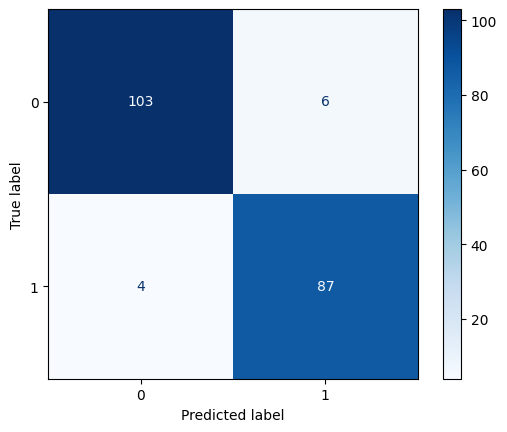

In [84]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot(cmap='Blues')

In [85]:
# how to select k optimum  value... by GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param={'n_neighbors':[1,2,3,4,5,6,7,8],'metric':['euclidean','manhattan']}

In [88]:
new_knn=KNeighborsClassifier()

In [89]:
gs_knn=GridSearchCV(new_knn,param_grid=param)

In [105]:
gs_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [91]:
gs_knn.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [92]:
gs_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 8}

In [93]:
gs_knn.best_score_

0.93125

In [94]:
y_pred=gs_knn.predict(x_test)

In [95]:
print('accuracy_score : ',accuracy_score(y_test,y_pred))

accuracy_score :  0.96


In [96]:
print('confusion_matrix: ',confusion_matrix(y_test,y_pred))

confusion_matrix:  [[104   5]
 [  3  88]]


confusion_matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7db6fde46950>


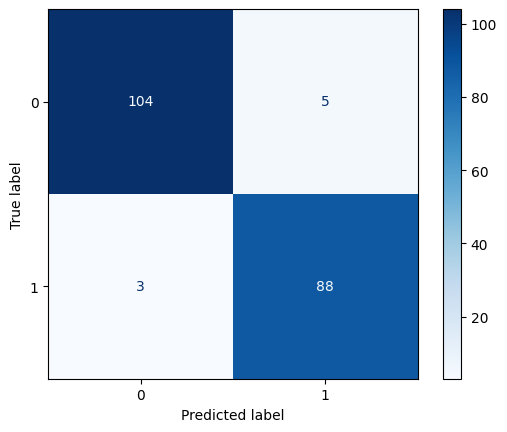

In [97]:
print('confusion_matrix: ',ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot(cmap='Blues'))

In [98]:
# get list of accuracy scores of each neighbor

In [99]:
accuracy=[]

for i in range(1,30):
  Knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  accuracy.append(accuracy_score(y_test,y_pred))



print(max(accuracy))

0.95


In [100]:
cross_vl=[]

for i in range(1,30):
  Knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  cross_vl.append(accuracy_score(y_test,y_pred))


print(cross_vl)
print(max(cross_vl))

[0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]
0.95


In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
cross_vl_acc=[]

for i in range(1,30):
  Knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
  cross_vl_acc.append(score.mean())
  print(score.mean())


# print(cross_vl_acc)
# print(max(cross_vl_acc))

0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925
0.925


In [106]:
cross_vl_acc=[]

for i in range(1,30):
  Knn=KNeighborsClassifier(n_neighbors=i)
  error=cross_val_score(knn,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
  print(error)
  cross_vl_acc.append(error.mean())
  print(error.mean())


# print(cross_vl_acc)
# print(max(cross_vl_acc))

[-0.075  -0.0875 -0.0875 -0.075  -0.1    -0.0375 -0.0375 -0.075  -0.075
 -0.1   ]
-0.07499999999999998
[-0.075  -0.0875 -0.0875 -0.075  -0.1    -0.0375 -0.0375 -0.075  -0.075
 -0.1   ]
-0.07499999999999998
[-0.075  -0.0875 -0.0875 -0.075  -0.1    -0.0375 -0.0375 -0.075  -0.075
 -0.1   ]
-0.07499999999999998
[-0.075  -0.0875 -0.0875 -0.075  -0.1    -0.0375 -0.0375 -0.075  -0.075
 -0.1   ]
-0.07499999999999998
[-0.075  -0.0875 -0.0875 -0.075  -0.1    -0.0375 -0.0375 -0.075  -0.075
 -0.1   ]
-0.07499999999999998
[-0.075  -0.0875 -0.0875 -0.075  -0.1    -0.0375 -0.0375 -0.075  -0.075
 -0.1   ]
-0.07499999999999998
[-0.075  -0.0875 -0.0875 -0.075  -0.1    -0.0375 -0.0375 -0.075  -0.075
 -0.1   ]
-0.07499999999999998
[-0.075  -0.0875 -0.0875 -0.075  -0.1    -0.0375 -0.0375 -0.075  -0.075
 -0.1   ]
-0.07499999999999998
[-0.075  -0.0875 -0.0875 -0.075  -0.1    -0.0375 -0.0375 -0.075  -0.075
 -0.1   ]
-0.07499999999999998
[-0.075  -0.0875 -0.0875 -0.075  -0.1    -0.0375 -0.0375 -0.075  -0.075
 

Text(0, 0.5, 'Error')

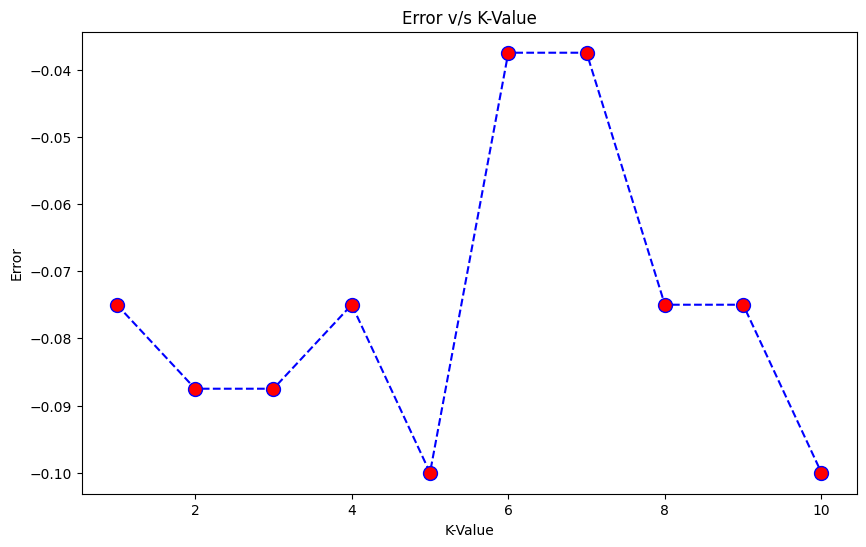

In [110]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(error) + 1),error,color='blue',linestyle='dashed',marker='o',markersize=10,markerfacecolor='red')
plt.title('Error v/s K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error')